### Dear reader, in order to run this notebook properly, please make sure to open the CSV file "Copenhagen venues" in the diretory of your IDE

In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install geopy

     |████████████████████████████████| 102kB 2.9MB/s ta 0:00:011
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/99/45/d1/14954797e2a976083182c2e7da9b4e924509e59b6e5c661061
Successfully built geographiclib
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install geocoder

     |████████████████████████████████| 102kB 2.9MB/s ta 0:00:011
     |████████████████████████████████| 829kB 24.8MB/s eta 0:00:01
     |████████████████████████████████| 81kB 20.1MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future


In [4]:
import geocoder

### Open the dataframe containing all the postal codes from Copenhagen

In [5]:
data = pd.read_csv('copenhagen_venues.csv', delimiter=',', error_bad_lines=False)
data.head()

,District,PostalCode,Street Latitude,Street Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kobenhavn K,1050,55.680453,12.58621,Det Kongelige Teater,55.679761,12.586075,Theater
1,Kobenhavn K,1050,55.680453,12.58621,Nyhavn,55.680247,12.589398,Harbor / Marina
2,Kobenhavn K,1050,55.680453,12.58621,Nebbiolo,55.681116,12.589191,Wine Bar
3,Kobenhavn K,1050,55.680453,12.58621,Kunsthal Charlottenborg,55.679926,12.588279,Art Gallery
4,Kobenhavn K,1050,55.680453,12.58621,Den Lille Fede,55.682199,12.585476,Mediterranean Restaurant


In [6]:
data.shape

(46592, 8)

### One hot encode it

In [7]:
# one hot encoding
copenhagen_onehot = pd.get_dummies(data[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
copenhagen_onehot['District'] = data['District']
 

# move neighborhood column to the first column
fixed_columns = [copenhagen_onehot.columns[-1]] + list(copenhagen_onehot.columns[:-1])
copenhagen_onehot = copenhagen_onehot[fixed_columns]

pd.set_option('display.max_columns', None)

copenhagen_onehot.head()

,District,Advertising Agency,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Capitol Building,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cruise,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Laundromat,Library,Lighthouse,Liquor Store,Lounge,Market,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Nursery School,Office,Opera House,Optical Shop,Other Great Outdoors,Paintball Field,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Kobenhavn K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kobenhavn K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [8]:
total_bs = copenhagen_onehot['Bike Shop'].sum()
total_bs

6

In [9]:
copenhagen_onehot.shape

(46592, 236)

### Group by the Districts

In [10]:
copenhagen_grouped = copenhagen_onehot.groupby('District').sum().reset_index()
copenhagen_grouped.head()

,District,Advertising Agency,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Capitol Building,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cruise,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Laundromat,Library,Lighthouse,Liquor Store,Lounge,Market,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Nursery School,Office,Opera House,Optical Shop,Other Great Outdoors,Paintball Field,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Albertslund,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,

In [11]:
copenhagen_grouped.shape

(55, 236)

### See the most common venues for each District

In [12]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [13]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [14]:
num_top_venues = 50

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District'] = copenhagen_grouped['District']

for ind in np.arange(copenhagen_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(copenhagen_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue,41th Most Common Venue,42th Most Common Venue,43th Most Common Venue,44th Most Common Venue,45th Most Common Venue,46th Most Common Venue,47th Most Common Venue,48th Most Common Venue,49th Most Common Venue,50th Most Common Venue
0,Albertslund,Café,Theme Park,Scandinavian Restaurant,Burger Joint,Hotel,Gay Bar,French Restaurant,Vietnamese Restaurant,Movie Theater,Gift Shop,Theater,Coffee Shop,Bakery,Restaurant,Music Venue,Hostel,Beer Bar,Beer Garden,Bar,Tea Room,Plaza,Theme Park Ride / Attraction,Grocery Store,Wine Bar,Pub,Brewery,Bookstore,Multiplex,Modern European Restaurant,Breakfast Spot,Paper / Office Supplies Store,Concert Hall,Fast Food Restaurant,Cocktail Bar,Sandwich Place,Playground,Irish Pub,Italian Restaurant,Indian Restaurant,Bistro,Sushi Restaurant,American Restaurant,Gluten-free Restaurant,Turkish Restaurant,Toy / Game Store,Tourist Information Center,Thrift / Vintage Store,Thai Restaurant,History Museum,Art Museum
1,Bagsvaerd,Café,Theme Park,Scandinavian Restaurant,Burger Joint,Hotel,Gay Bar,French Restaurant,Vietnamese Restaurant,Movie Theater,Gift Shop,Theater,Coffee Shop,Bakery,Restaurant,Music Venue,Hostel,Beer Bar,Beer Garden,Bar,Tea Room,Plaza,Theme Park Ride / Attraction,Grocery Store,Wine Bar,Pub,Brewery,Bookstore,Multiplex,Modern European Restaurant,Breakfast Spot,Paper / Office Supplies Store,Concert Hall,Fast Food Restaurant,Cocktail Bar,Sandwich Place,Playground,Irish Pub,Italian Restaurant,Indian Restaurant,Bistro,Sushi Restaurant,American Restaurant,Gluten-free Restaurant,Turkish Restaurant,Toy / Game Store,Tourist Information Center,Thrift / Vintage Store,Thai Restaurant,History Museum,Art Museum
2,Ballerup,Café,Theme Park,Scandinavian Restaurant,Burger Joint,Hotel,Gay Bar,French Restaurant,Vietnamese Restaurant,Movie Theater,Gift Shop,Theater,Coffee Shop,Bakery,Restaurant,Music Venue,Hostel,Beer Bar,Beer Garden,Bar,Tea Room,Plaza,Theme Park Ride / Attraction,Grocery Store,Wine Bar,Pub,Brewery,Bookstore,Multiplex,Modern European Restaurant,Breakfast Spot,Paper / Office Supplies Store,Concert Hall,Fast Food Restaurant,Cocktail Bar,Sandwich Place,Playground,Irish Pub,Italian Restaurant,Indian Restaurant,Bistro,Sushi Restaurant,American Restaurant,Gluten-free Restaurant,Turkish Restaurant,Toy / Game Store,Tourist Information Center,Thrift / Vintage Store,Thai Restaurant,History Museum,Art Museum
3,Brondby,Café,Theme Park,Scandinavian Restaurant,Burger Joint,Hotel,Gay Bar,French Restaurant,Vietnamese Restaurant,Movie Theater,Gift Shop,Theater,Coffee Shop,Bakery,Restaurant,Music Venue,Hostel,Beer Bar,Beer Garden,Bar,Tea Room,Plaza,Theme Park Ride / Attraction,Grocery Store,Wine Bar,Pub,Brewery,Bookstore,Multiplex,Modern European Restaurant,Breakfast Spot,Paper / Office Supplies Store,Concert Hall,Fast Food Restaurant,Cocktail Bar,Sandwich Place,Playground,Irish Pub,Italian Restaurant,Indian Restaurant,Bistro,Sushi Restaurant,American Restaurant,Gluten-free Restaurant,Turkish Restaurant,Toy / Game Store,Tourist Information Center,Thrift / Vintage Store,Thai Restaurant,History Museum,Art Museum
4,Bron

### Cluster the data set

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [17]:
# set number of clusters
kclusters = 10

kopenhagen_grouped_clustering = copenhagen_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kopenhagen_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 9, 3, 0, 0, 0, 0, 0, 4, 0, 4],
      dtype=int32)

In [18]:
# add clustering labels
copenhagen_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
copenhagen_grouped

,Cluster Labels,District,Advertising Agency,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Capitol Building,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cruise,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Laundromat,Library,Lighthouse,Liquor Store,Lounge,Market,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Nursery School,Office,Opera House,Optical Shop,Other Great Outdoors,Paintball Field,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,Albertslund,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0

### Get the coordinates for each district in Copenhagen

In [19]:
# define the dataframe columns
column_names = ['District', 'Latitude', 'Longitude'] 

# instantiate the dataframe
districts_geopy = pd.DataFrame(columns=column_names)

#empty dataframe
districts_geopy.head()

,District,Latitude,Longitude


In [20]:
lastvalue = copenhagen_grouped.shape[0]

n = 0

while(n<lastvalue) : 
    
    city = copenhagen_grouped['District'][n]
    #while(lat_lng_coords is None) :
    g = geocoder.arcgis('{}, Copenhagen, Denmark'.format(city))
    lat_lng_coords = g.latlng
    neighborhood_lat = lat_lng_coords[0]
    neighborhood_lon = lat_lng_coords[1]
   # print(n, greg, lat_lng_coords, borough, neighborhood_name, neighborhood_lat, neighborhood_lon)
    
    districts_geopy = districts_geopy.append({'District': city,
                                          
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon},ignore_index=True)
    
    n = n+1

In [21]:
districts_geopy.head()

,District,Latitude,Longitude
0,Albertslund,55.682712,12.485248
1,Bagsvaerd,55.675670,12.567560
2,Ballerup,55.675670,12.567560
3,Brondby,55.675670,12.567560
4,Brondby Strand,55.681140,12.588850


In [22]:
districts_geopy.shape

(55, 3)

### See the clusters in a map

In [23]:
copenhagen_finally = copenhagen_grouped.join(districts_geopy.set_index('District'), on='District')
copenhagen_finally.head(55)

,Cluster Labels,District,Advertising Agency,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Capitol Building,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cruise,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Laundromat,Library,Lighthouse,Liquor Store,Lounge,Market,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Nursery School,Office,Opera House,Optical Shop,Other Great Outdoors,Paintball Field,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Latitude,Longitude
0,0,Albertslund,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

In [24]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 

In [25]:
address = 'Copenhagen, Denmark'

geolocator = Nominatim(user_agent="copenhagen_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Copenhagen are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Copenhagen are 55.6867243, 12.5700724.


In [26]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(copenhagen_finally['Latitude'], copenhagen_finally['Longitude'], copenhagen_finally['District'], copenhagen_finally['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

### Check the size of the clusters

In [27]:
clusters_city = copenhagen_finally.groupby(['Cluster Labels'])['District'].apply(', '.join).reset_index()
clusters_city

,Cluster Labels,District
0,0,"Albertslund, Bagsvaerd, Ballerup, Brondby, Bro..."
1,1,Kobenhavn V
2,2,Kobenhavn K
3,3,Frederiksberg C
4,4,"Bronshoj, Dyssegard, Hellerup, Herlev, Kastrup..."
5,5,Kobenhavn N
6,6,Kobenhavn o
7,7,Vanlose
8,8,Kobenhavn NV
9,9,Frederiksberg


In [28]:
cluster_size = copenhagen_finally.drop(['District','Latitude', 'Longitude'], axis=1).groupby('Cluster Labels').sum()
#cluster_size = copenhagen_finally.groupby('Cluster Labels').sum()
cluster_size.head(10)

,Advertising Agency,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beach,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Boat Rental,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Capitol Building,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cruise,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dumpling Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General College & University,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Laundromat,Library,Lighthouse,Liquor Store,Lounge,Market,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Nursery School,Office,Opera House,Optical Shop,Other Great Outdoors,Paintball Field,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Public Art,Racetrack,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Road,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tech Startup,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,36.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,108.0,72.0,0.0,0.0,0.0,72.0,72.0,0.0,0.0,36.0,0.0,0.0,36.0,0.0,0.0,36.0,36.0,0.0,144.0,0.0,0.0,0.0,0.0,288.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,108.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,0.0,0.0,36.0,0.0,0.0,0.0,108.0,0.0,108.0,36.0,0.0,0.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,

In [29]:
clusters_city['Venues on each Cluster']=cluster_size.sum(axis=1)
clusters_city.head(10)

,Cluster Labels,District,Venues on each Cluster
0,0,"Albertslund, Bagsvaerd, Ballerup, Brondby, Bro...",3600.0
1,1,Kobenhavn V,12341.0
2,2,Kobenhavn K,20384.0
3,3,Frederiksberg C,9996.0
4,4,"Bronshoj, Dyssegard, Hellerup, Herlev, Kastrup...",65.0
5,5,Kobenhavn N,86.0
6,6,Kobenhavn o,52.0
7,7,Vanlose,33.0
8,8,Kobenhavn NV,22.0
9,9,Frederiksberg,13.0


### How many Cafés there are on each Cluster

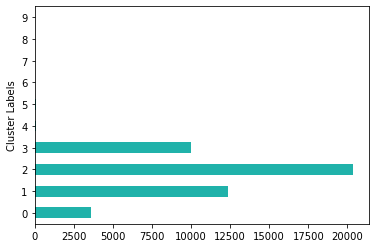

In [30]:
import matplotlib.colors as mcolors

x = clusters_city['Venues on each Cluster']=cluster_size.sum(axis=1)
x.plot(kind='barh', color='lightseagreen')


In [31]:
cluster_size[['Café','Coffee Shop', 'Bike Shop']]

,Café,Coffee Shop,Bike Shop
Cluster Labels,,,
0,288.0,108.0,0.0
1,937.0,420.0,6.0
2,1170.0,1046.0,0.0
3,800.0,296.0,0.0
4,1.0,0.0,0.0
5,3.0,6.0,0.0
6,0.0,1.0,0.0
7,2.0,0.0,0.0
8,1.0,1.0,0.0


In [32]:
cluster_graph = cluster_size[['Café','Coffee Shop', 'Bike Shop']].iloc[1:4]
cluster_graph

,Café,Coffee Shop,Bike Shop
Cluster Labels,,,
1,937.0,420.0,6.0
2,1170.0,1046.0,0.0
3,800.0,296.0,0.0


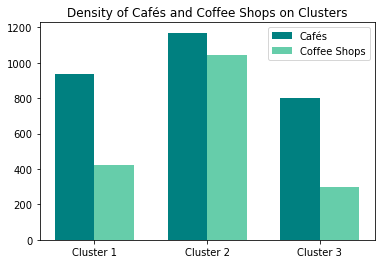

In [33]:
import matplotlib.pyplot as plt


N = 3
café = cluster_graph['Café']

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, café, width, bottom=0, color='teal')

coffee = cluster_graph['Coffee Shop']
p2 = ax.bar(ind + width, coffee, width, bottom=0, color='mediumaquamarine')

#bike = cluster_size['Bike Shop']
#p3 = ax.bar(ind + width, bike, width, bottom=0)

ax.set_title('Density of Cafés and Coffee Shops on Clusters')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Cluster 1', 'Cluster 2', 'Cluster 3'))

ax.legend((p1[0], p2[0]), ('Cafés', 'Coffee Shops'))
ax.autoscale_view()

plt.show()